In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
df[invalid_cols] = df[invalid_cols].fillna(df[invalid_cols].median())

C:\Users\Hp\AppData\Local\Temp\ipykernel_2848\2395524604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x='Outcome', data=df, palette='Set2')


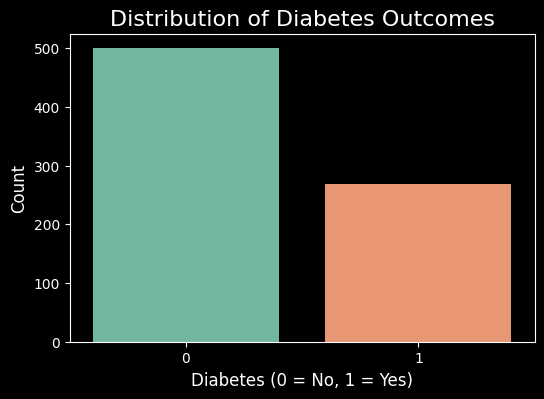

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(6, 4))

countplot = sns.countplot(x='Outcome', data=df, palette='Set2')
countplot.set_title('Distribution of Diabetes Outcomes', fontsize=16, color='white')
countplot.set_xlabel('Diabetes (0 = No, 1 = Yes)', fontsize=12, color='white')
countplot.set_ylabel('Count', fontsize=12, color='white')

plt.savefig('images/diabetes_countplot.png', dpi=300, bbox_inches='tight')

plt.show()

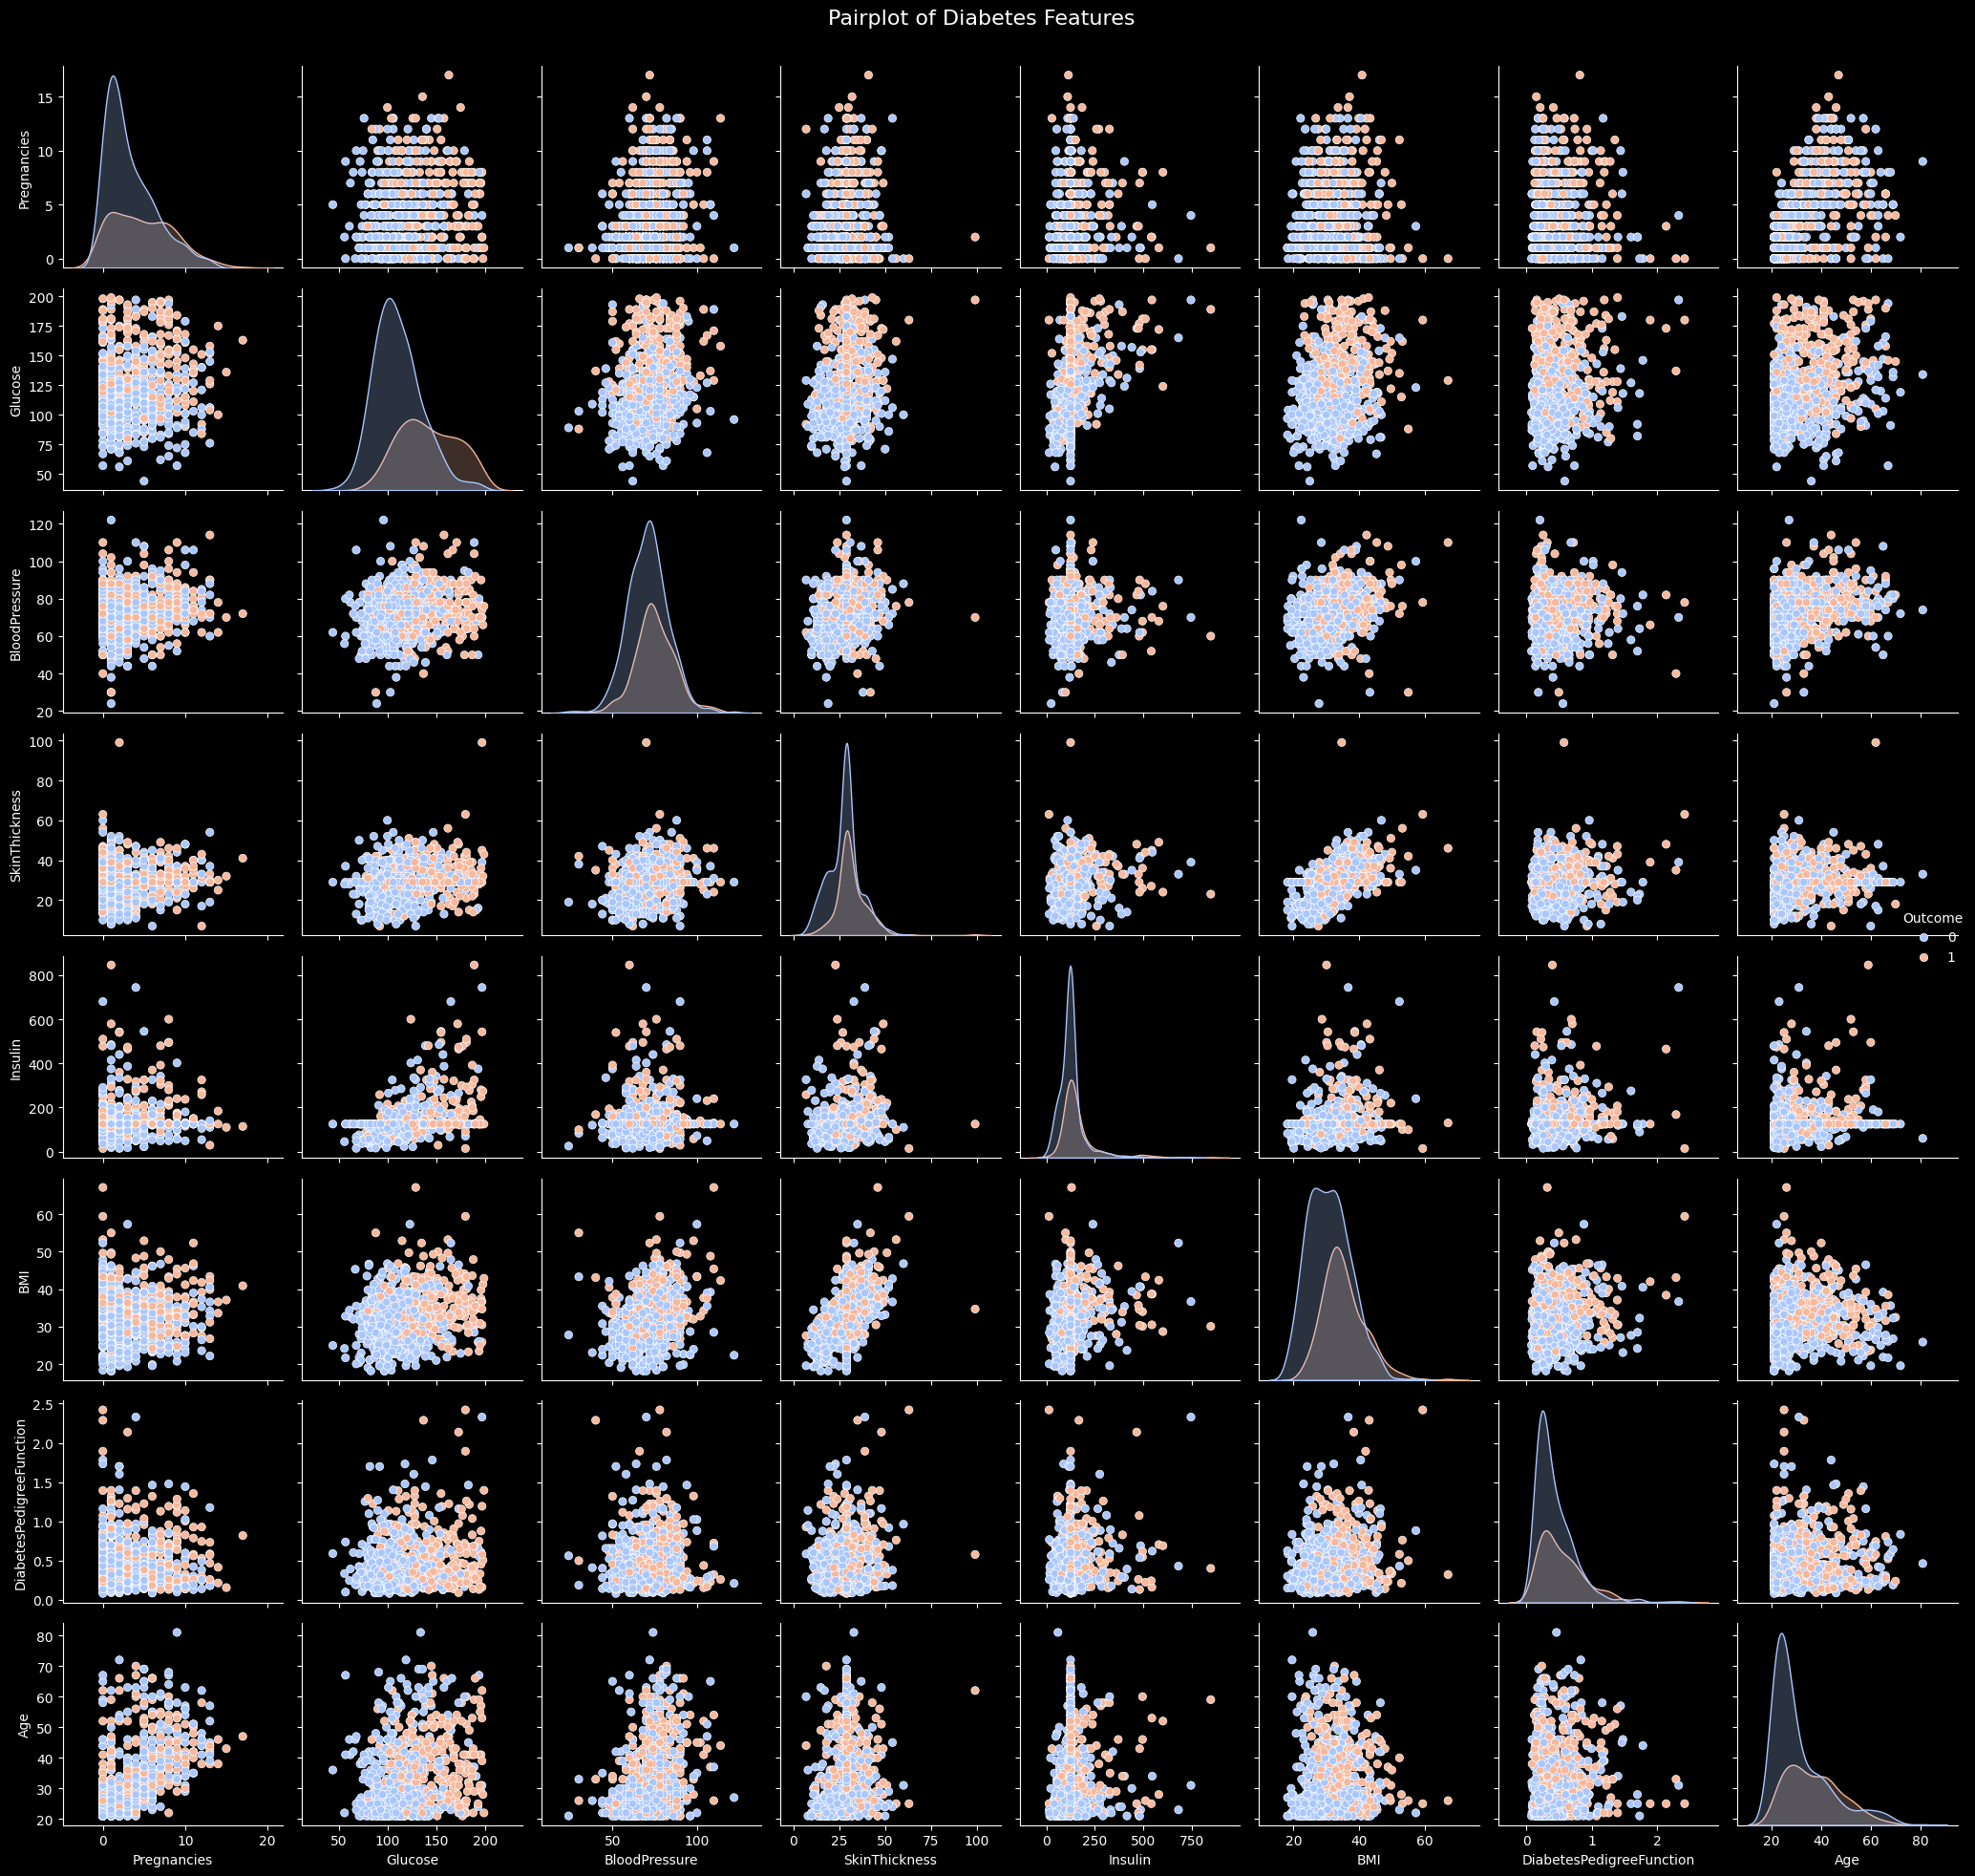

In [10]:
plt.style.use('dark_background')

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']

plot = sns.pairplot(df[cols + ['Outcome']], hue='Outcome', palette='coolwarm', diag_kind='kde')
plot.fig.suptitle('Pairplot of Diabetes Features', fontsize=16, color='white')
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)

plot.savefig("images/diabetes_pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

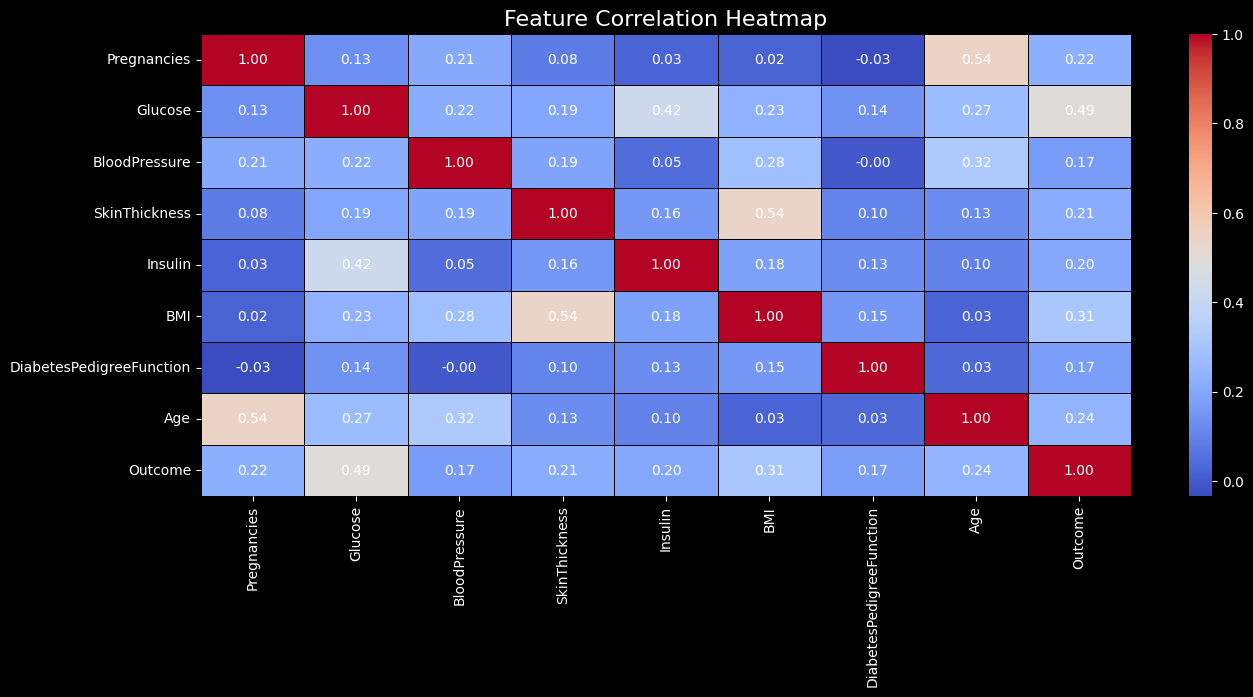

In [11]:
plt.style.use('dark_background')

plt.figure(figsize=(15, 6))

heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm',
          annot_kws={"color": "white"}, linewidths=0.5, linecolor='black')
plt.title('Feature Correlation Heatmap', fontsize=16, color='white')

plt.savefig("images/diabetes_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
models = {
    "SVM (Linear)": svm.SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

SVM (Linear) Accuracy: 0.7727
Logistic Regression Accuracy: 0.7403
Decision Tree Accuracy: 0.6688
Random Forest Accuracy: 0.7532
Gradient Boosting Accuracy: 0.7792


In [17]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [19]:
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy :", accuracy_score(y_test, test_pred))

Train Accuracy: 0.7801302931596091
Test Accuracy : 0.7727272727272727


In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification Report:", classification_report(y_test, test_pred))

Confusion Matrix:
 [[91  9]
 [26 28]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [21]:
input_data = (1, 189, 40, 27, 846, 30.1, 0.398, 59)
input_np = np.asarray(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_np)
prediction = model.predict(input_scaled)[0]

if prediction == 0:
    print('The person does NOT have diabetes.')
else:
    print('The person HAS diabetes.')

The person HAS diabetes.


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
